In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#loading importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading/loading data
df= pd.read_csv("../input/netflix-shows/netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#7787 records and 12 columns
df.shape

(7787, 12)

In [9]:
#null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#percentage of null values
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [11]:
#director column having maximum of 30% null values
#director column has minimal use and having no logical way to replace values
#hence getting droped
df.drop(["director"],inplace= True,axis= 1)

In [12]:
#similarly cast column also getting droped 
df.drop(["cast"],inplace= True,axis= 1)

In [13]:
#temporarily filling null values of date_added with unknown later to be replaced with logical value
df.date_added.fillna("unknown",inplace= True)

In [14]:
df.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [15]:
#creating new year column from date_added column
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1])

In [16]:
#most occuring date:2019
df.year.value_counts()

 2019      2153
 2020      2009
 2018      1685
 2017      1225
 2016       443
 2021       117
 2015        88
 2014        25
 2011        13
 2013        11
unknown      10
 2012         3
 2009         2
 2008         2
 2010         1
Name: year, dtype: int64

In [17]:
#replacing unknown values with 2019(most occuring date year)
df["year"]= df.year.apply(lambda x: str(x).replace("unknown","2019"))

In [18]:
#removing extra space in the year column values
df["year"]= df.year.apply(lambda x: str(x).replace(" ",""))

In [19]:
df.year.value_counts()

2019    2163
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year, dtype: int64

In [20]:
df.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
year              0
dtype: int64

In [21]:
#most occuring country
df.country.value_counts()

United States                                      2555
India                                               923
United Kingdom                                      397
Japan                                               226
South Korea                                         183
                                                   ... 
Argentina, Uruguay, Spain, France                     1
Canada, United States, India, United Kingdom          1
United Kingdom, Jordan, Qatar, Iran                   1
United States, Australia, Samoa, United Kingdom       1
United Kingdom, South Korea                           1
Name: country, Length: 681, dtype: int64

In [22]:
#filling null values of country with most occuring country
df.country.fillna("United_states",inplace= True)

In [23]:
#most occuring rating
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [24]:
#filling null values of rating with most occuring rating
df.rating.fillna("TV-MA",inplace= True)

In [25]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
dtype: int64

Text(0.5, 0, 'Number of content')

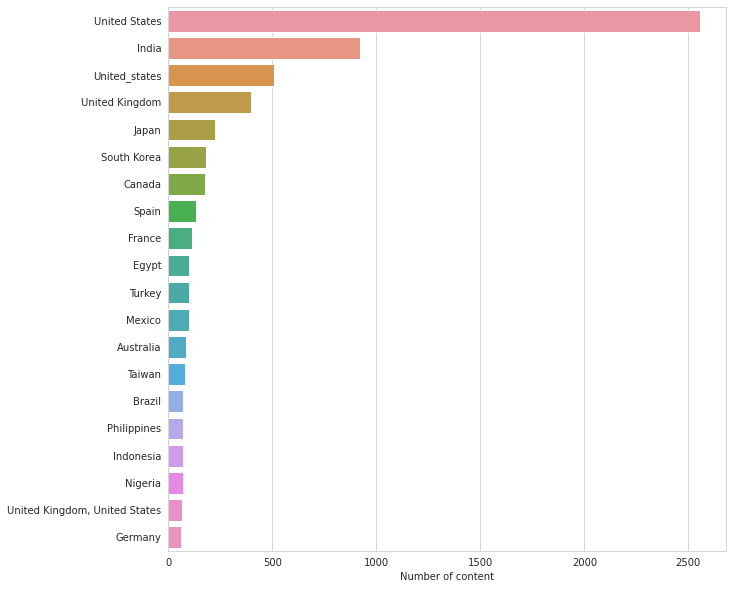

In [27]:
#countries with most contribution to netflix content
x= df.country.value_counts().head(20)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Number of content")

<AxesSubplot:xlabel='type', ylabel='count'>

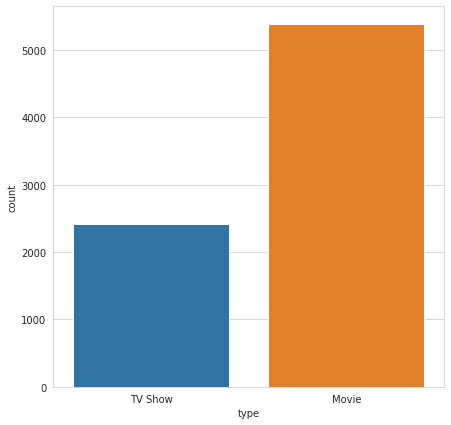

In [28]:
#distribution of type of content on netflix 
#69.1 percent of contents are movies while 30 percent are tv shows
plt.figure(figsize=(7,7))

x= df.type.value_counts()
sns.countplot(x= "type",data= df)


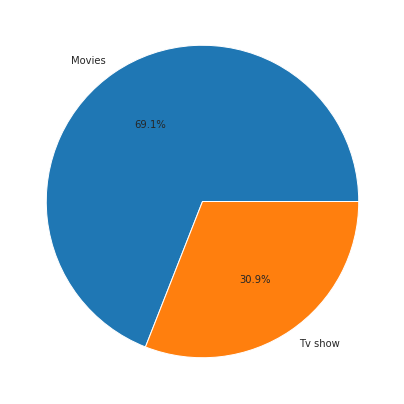

In [29]:
plt.figure(figsize=(7,9))

label= ["Movies","Tv show"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%")
plt.show()

<AxesSubplot:>

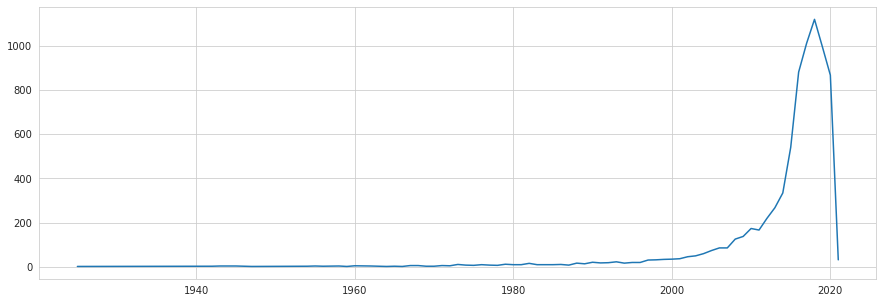

In [30]:
#Netflix content releases over the years
x= df.release_year.value_counts()
plt.figure(figsize=(15,5))

sns.lineplot(x=x.index ,y= x.values)

Text(0, 0.5, 'No of content')

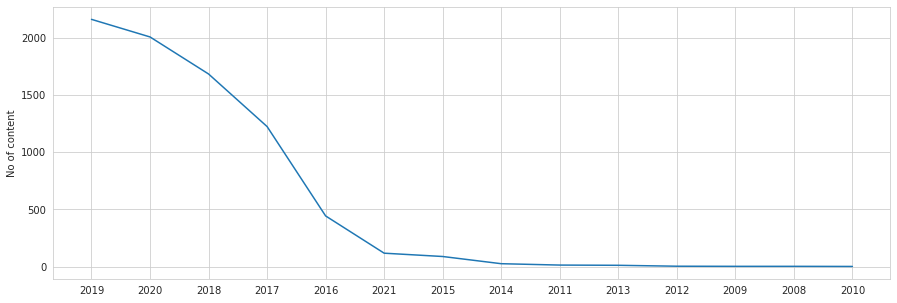

In [31]:
#Number of content added on netflix over the years
plt.figure(figsize=(15,5))
x= df.year.value_counts()
ax= sns.lineplot(x.index,x.values)
ax.set_ylabel("No of content")


<AxesSubplot:>

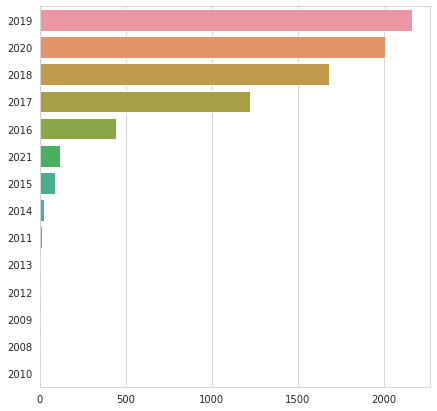

In [32]:
plt.figure(figsize=(7,7))

sns.barplot(x.values,x.index)

<AxesSubplot:xlabel='rating', ylabel='count'>

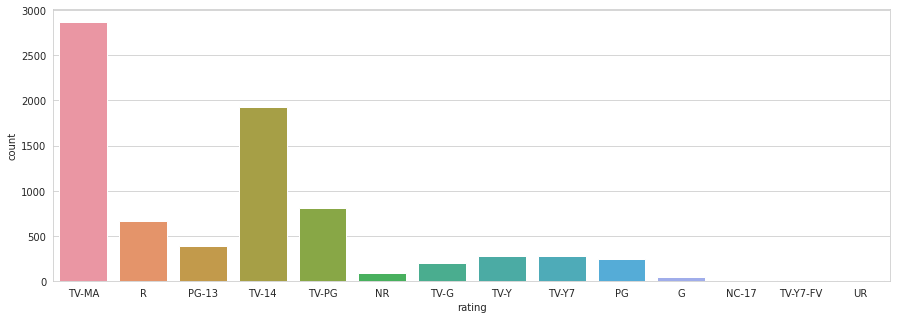

In [33]:
#content distribution based on rating
#most of the content of netflix is either rated TV-MA or TV-14
plt.figure(figsize=(15,5))
sns.countplot(x= "rating",data= df)

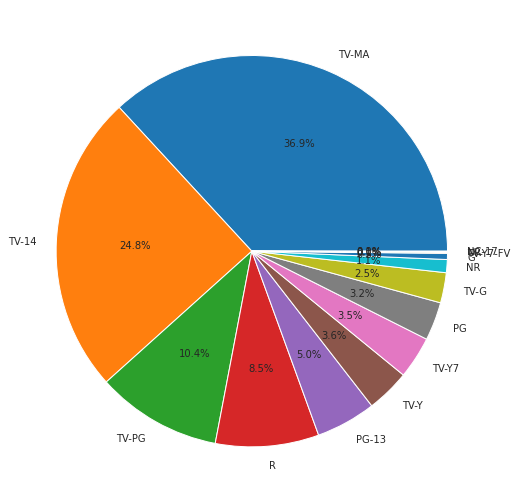

In [34]:
x= df.rating.value_counts()
plt.figure(figsize=(9,9))

labels= list(x.index)
plt.pie(x.values,labels= labels,autopct= "%1.1f%%")
plt.show()

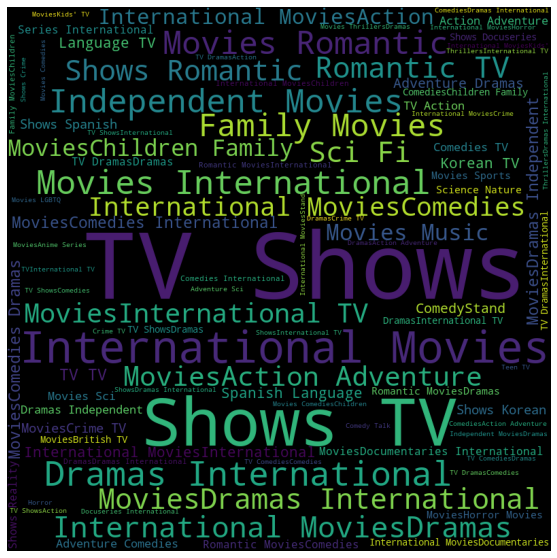

In [51]:
from wordcloud import WordCloud ,STOPWORDS
plt.figure(figsize= (10,10))
words= "".join(df["listed_in"])
final = WordCloud(width = 800, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()